<a href="https://colab.research.google.com/github/armanalam6342/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

##<b> Import Modules

In [ ]:
#importing pandas ,numpy,matplotlib.pyplot & seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#to display all the graph in the workbook 
sns.set_style("whitegrid",{'grid.linestyle': '--'})

## <b> Loading the dataset

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/SeoulBikeData.csv", encoding = "ISO-8859-1")

In [13]:
# Copy the data for backup
df = data.copy()

In [14]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [12]:
# Data shape
df.shape

(8760, 14)

In [10]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Statistical info 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


## <b> Problems satement 
  1. Date column dtype is Object
  2. We have to extract information from date column
  3. we have three object column

##<b> Preprocessing the data

In [22]:
# Checking null values of data 
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [23]:
# Checking duplicate
df.duplicated().sum()

0

In [31]:
# converting date column dtype object to date 
df['Date']=pd.to_datetime(df['Date'])

In [48]:
# split day, month and year in three column
df['day_of_week'] = df['Date'].dt.day_name() # extract week name from Date column
df["month"] = df['Date'].dt.month_name()   # extract month name from Date column
df["year"] = df['Date'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type 

In [50]:
df.drop(columns=['Date'],inplace=True)

##<b> Exploratory data analysis 

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

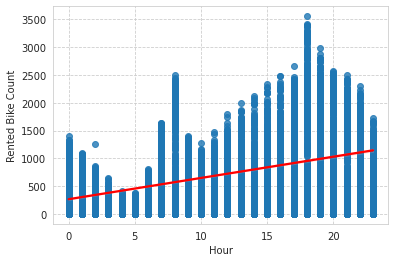

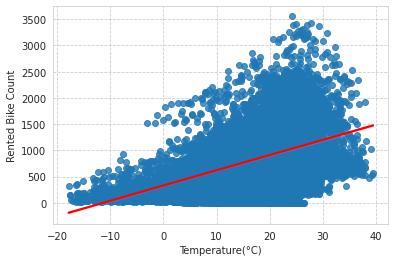

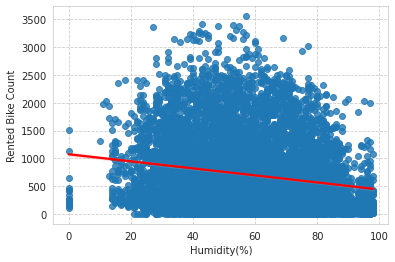

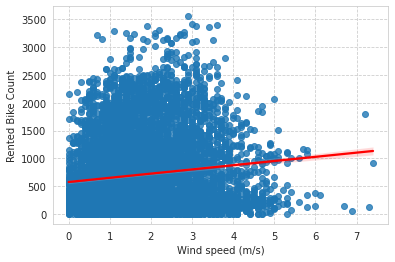

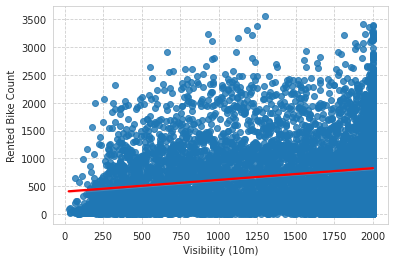

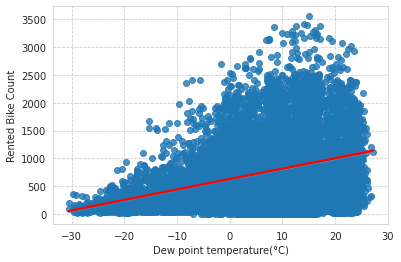

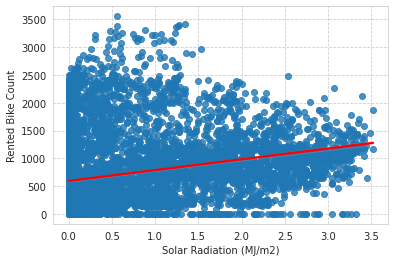

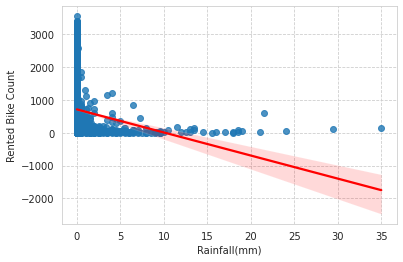

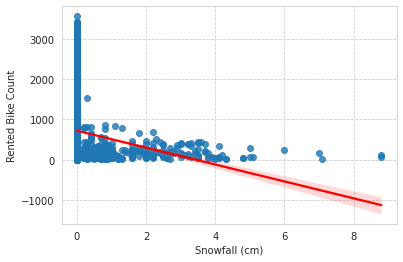

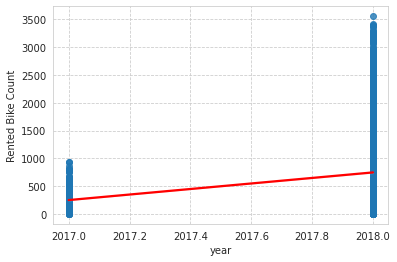

In [44]:

for col in df.describe().columns:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=df[col],y=df["Rented Bike Count"],line_kws={"color": "red"})
  
  plt.show()

In [45]:
num_col = df.describe().columns

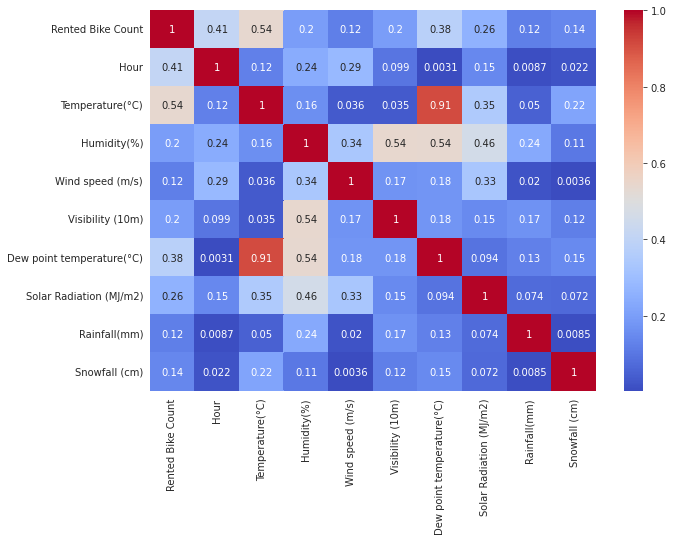

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(abs(df.corr()),cmap='coolwarm',annot=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
num_col

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [ ]:
calc_vif(df[[i for i in num_col if i not in ['Rented Bike Count','Temperature(°C)']]])

,variables,VIF
0,Hour,3.847933
1,Humidity(%),5.262460
2,Wind speed (m/s),4.729187
3,Visibility (10m),4.964387
4,Dew point temperature(°C),1.656085
5,Solar Radiation (MJ/m2),1.914776
6,Rainfall(mm),1.079939
7,Snowfall (cm),1.111339


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df['Date']= pd.to_datetime(df['Date'])

In [ ]:
df['year']= df['Date'].dt.strftime('%y')

In [ ]:
df.drop(columns='Date',inplace=True)

In [ ]:
df.drop(columns='Temperature(°C)',inplace=True)

In [ ]:
df.corr()['Rented Bike Count']

Rented Bike Count            1.000000
Hour                         0.410257
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Name: Rented Bike Count, dtype: float64

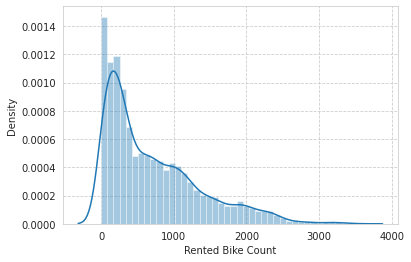

In [ ]:
sns.distplot(df['Rented Bike Count'])

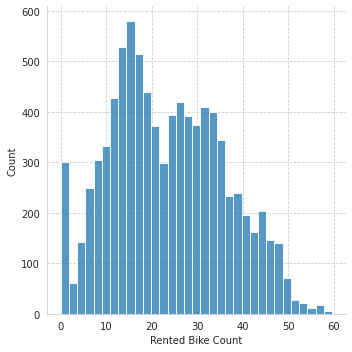

In [ ]:
sns.displot(np.sqrt(df['Rented Bike Count']))

In [ ]:
df.head(1)

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year
0,254,0,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,17


In [ ]:
new_df = pd.get_dummies(df, drop_first=True)

In [ ]:
new_df.head(1)

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,year_18
0,254,0,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1,0


In [ ]:
X = new_df.drop(columns='Rented Bike Count')
y =np.sqrt(new_df['Rented Bike Count'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
Y_pred = regressor.predict(X_test)
print('Reg Score',regressor.score(X_test,y_test))
print(regressor.score(X_train,y_train))

Reg Score 0.6829615471334327
0.6491519660627864


In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
def score_metrix (actual,predicted):
  MSE  = mean_squared_error(actual,predicted)
  print("MSE :" , MSE)

  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  r2 = r2_score(actual,predicted)
  print("R2 :" ,r2)
  print("Adjusted R2 : ",1-(1-r2_score(actual,predicted))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [ ]:
score_metrix(y_test**2,Y_pred**2)

MSE : 166182.9336854821
RMSE : 407.655410470022
R2 : 0.6000146883539275
Adjusted R2 :  0.5967908574022608


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2)
poly.fit(X_train)
x_train_p=poly.fit_transform(X_train)
x_test_p=poly.fit_transform(X_test)

In [ ]:
regressor.fit(x_train_p,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressor.score(x_test_p,y_test)

0.786106972560124

In [ ]:
y_pred_p = regressor.predict(x_test_p)

In [ ]:
score_metrix(y_test**2,y_pred_p**2)

MSE : 111897.07312798551
RMSE : 334.5101988400137
R2 : 0.7306751982602009
Adjusted R2 :  0.7285044744695519


##model 3

In [ ]:
df.head()

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month
0,254,0,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,17,Jan
1,204,1,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,17,Jan
2,173,2,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,17,Jan
3,107,3,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,17,Jan
4,78,4,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,17,Jan


In [ ]:
data['Date']= pd.to_datetime(data['Date'])

In [ ]:
df['month']= data['Date'].dt.strftime('%b')

In [ ]:
new_df = pd.get_dummies(df,drop_first=True)

In [ ]:
X = new_df.drop(columns='Rented Bike Count')
y =np.sqrt(new_df['Rented Bike Count'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
Y_pred = regressor.predict(X_test)
print('Reg Score',regressor.score(X_test,y_test))
print(regressor.score(X_train,y_train))

Reg Score 0.6908497463999894
0.6590226541387867


In [ ]:
score_metrix(y_test**2,Y_pred**2)

MSE : 159802.0565185247
RMSE : 399.75249407417675
R2 : 0.6153728065770127
Adjusted R2 :  0.6098017290361235
